<a href="https://colab.research.google.com/github/revanthjavvaji/Intern_Task/blob/main/Spaceship_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.shape

(8693, 14)

In [7]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#Imputing Numerical Columns

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_df[['Age']])
train_df['Age'] = imputer.transform(train_df[['Age']])


In [10]:
imputer.fit(train_df[['RoomService']])
train_df['RoomService']=imputer.transform(train_df[['RoomService']])

In [11]:
imputer.fit(train_df[['FoodCourt']])
train_df['FoodCourt']=imputer.transform(train_df[['FoodCourt']])


In [12]:
imputer.fit(train_df[['ShoppingMall']])
train_df['ShoppingMall']=imputer.transform(train_df[['ShoppingMall']])

In [13]:
imputer.fit(train_df[['Spa']])
train_df['Spa']=imputer.transform(train_df[['Spa']])

In [14]:
imputer.fit(train_df[['VRDeck']])
train_df['VRDeck']=imputer.transform(train_df[['VRDeck']])

In [15]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

#Imputing Categorical Columns

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(train_df[['HomePlanet']])
train_df['HomePlanet'] = imputer.transform(train_df[['HomePlanet']])

In [17]:
imputer.fit(train_df[['CryoSleep']])
train_df['CryoSleep'] = imputer.transform(train_df[['CryoSleep']])

In [18]:
imputer.fit(train_df[['Cabin']])
train_df['Cabin'] = imputer.transform(train_df[['Cabin']])

In [19]:
imputer.fit(train_df[['Destination']])
train_df['Destination'] = imputer.transform(train_df[['Destination']])

In [20]:
imputer.fit(train_df[['VIP']])
train_df['VIP'] = imputer.transform(train_df[['VIP']])

In [21]:
imputer.fit(train_df[['Destination']])
train_df['Destination'] = imputer.transform(train_df[['Destination']])

In [22]:
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

#Computing Total Bill

In [23]:
train_df['Total_Bill']= train_df['Total_Bill'] = train_df[['RoomService', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [24]:
train_df['Total_Bill']

0          0.0
1        727.0
2       6807.0
3       3893.0
4       1021.0
         ...  
8688    1717.0
8689       0.0
8690    1873.0
8691    3588.0
8692     138.0
Name: Total_Bill, Length: 8693, dtype: float64

In [25]:
print(np.mean(train_df['Total_Bill']))

print(np.median(train_df['Total_Bill']))

1014.4103558107619
422.0


In [26]:
print(np.max(train_df['Total_Bill']))
print(np.min(train_df['Total_Bill']))

28600.0
0.0


#LableEncoder

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported','Cabin']
train_df_encoded=train_df.copy()
for column in categorical_columns:
    train_df_encoded[column] = label_encoder.fit_transform(train_df[column])

train_df_encoded

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total_Bill
0,0001_01,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0
1,0002_01,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,727.0
2,0003_01,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,6807.0
3,0003_02,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3893.0
4,0004_01,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,146,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,1717.0
8689,9278_01,0,1,5280,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0.0
8690,9279_01,0,0,5285,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1873.0
8691,9280_01,1,0,2131,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,3588.0


<Figure size 1000x1000 with 0 Axes>

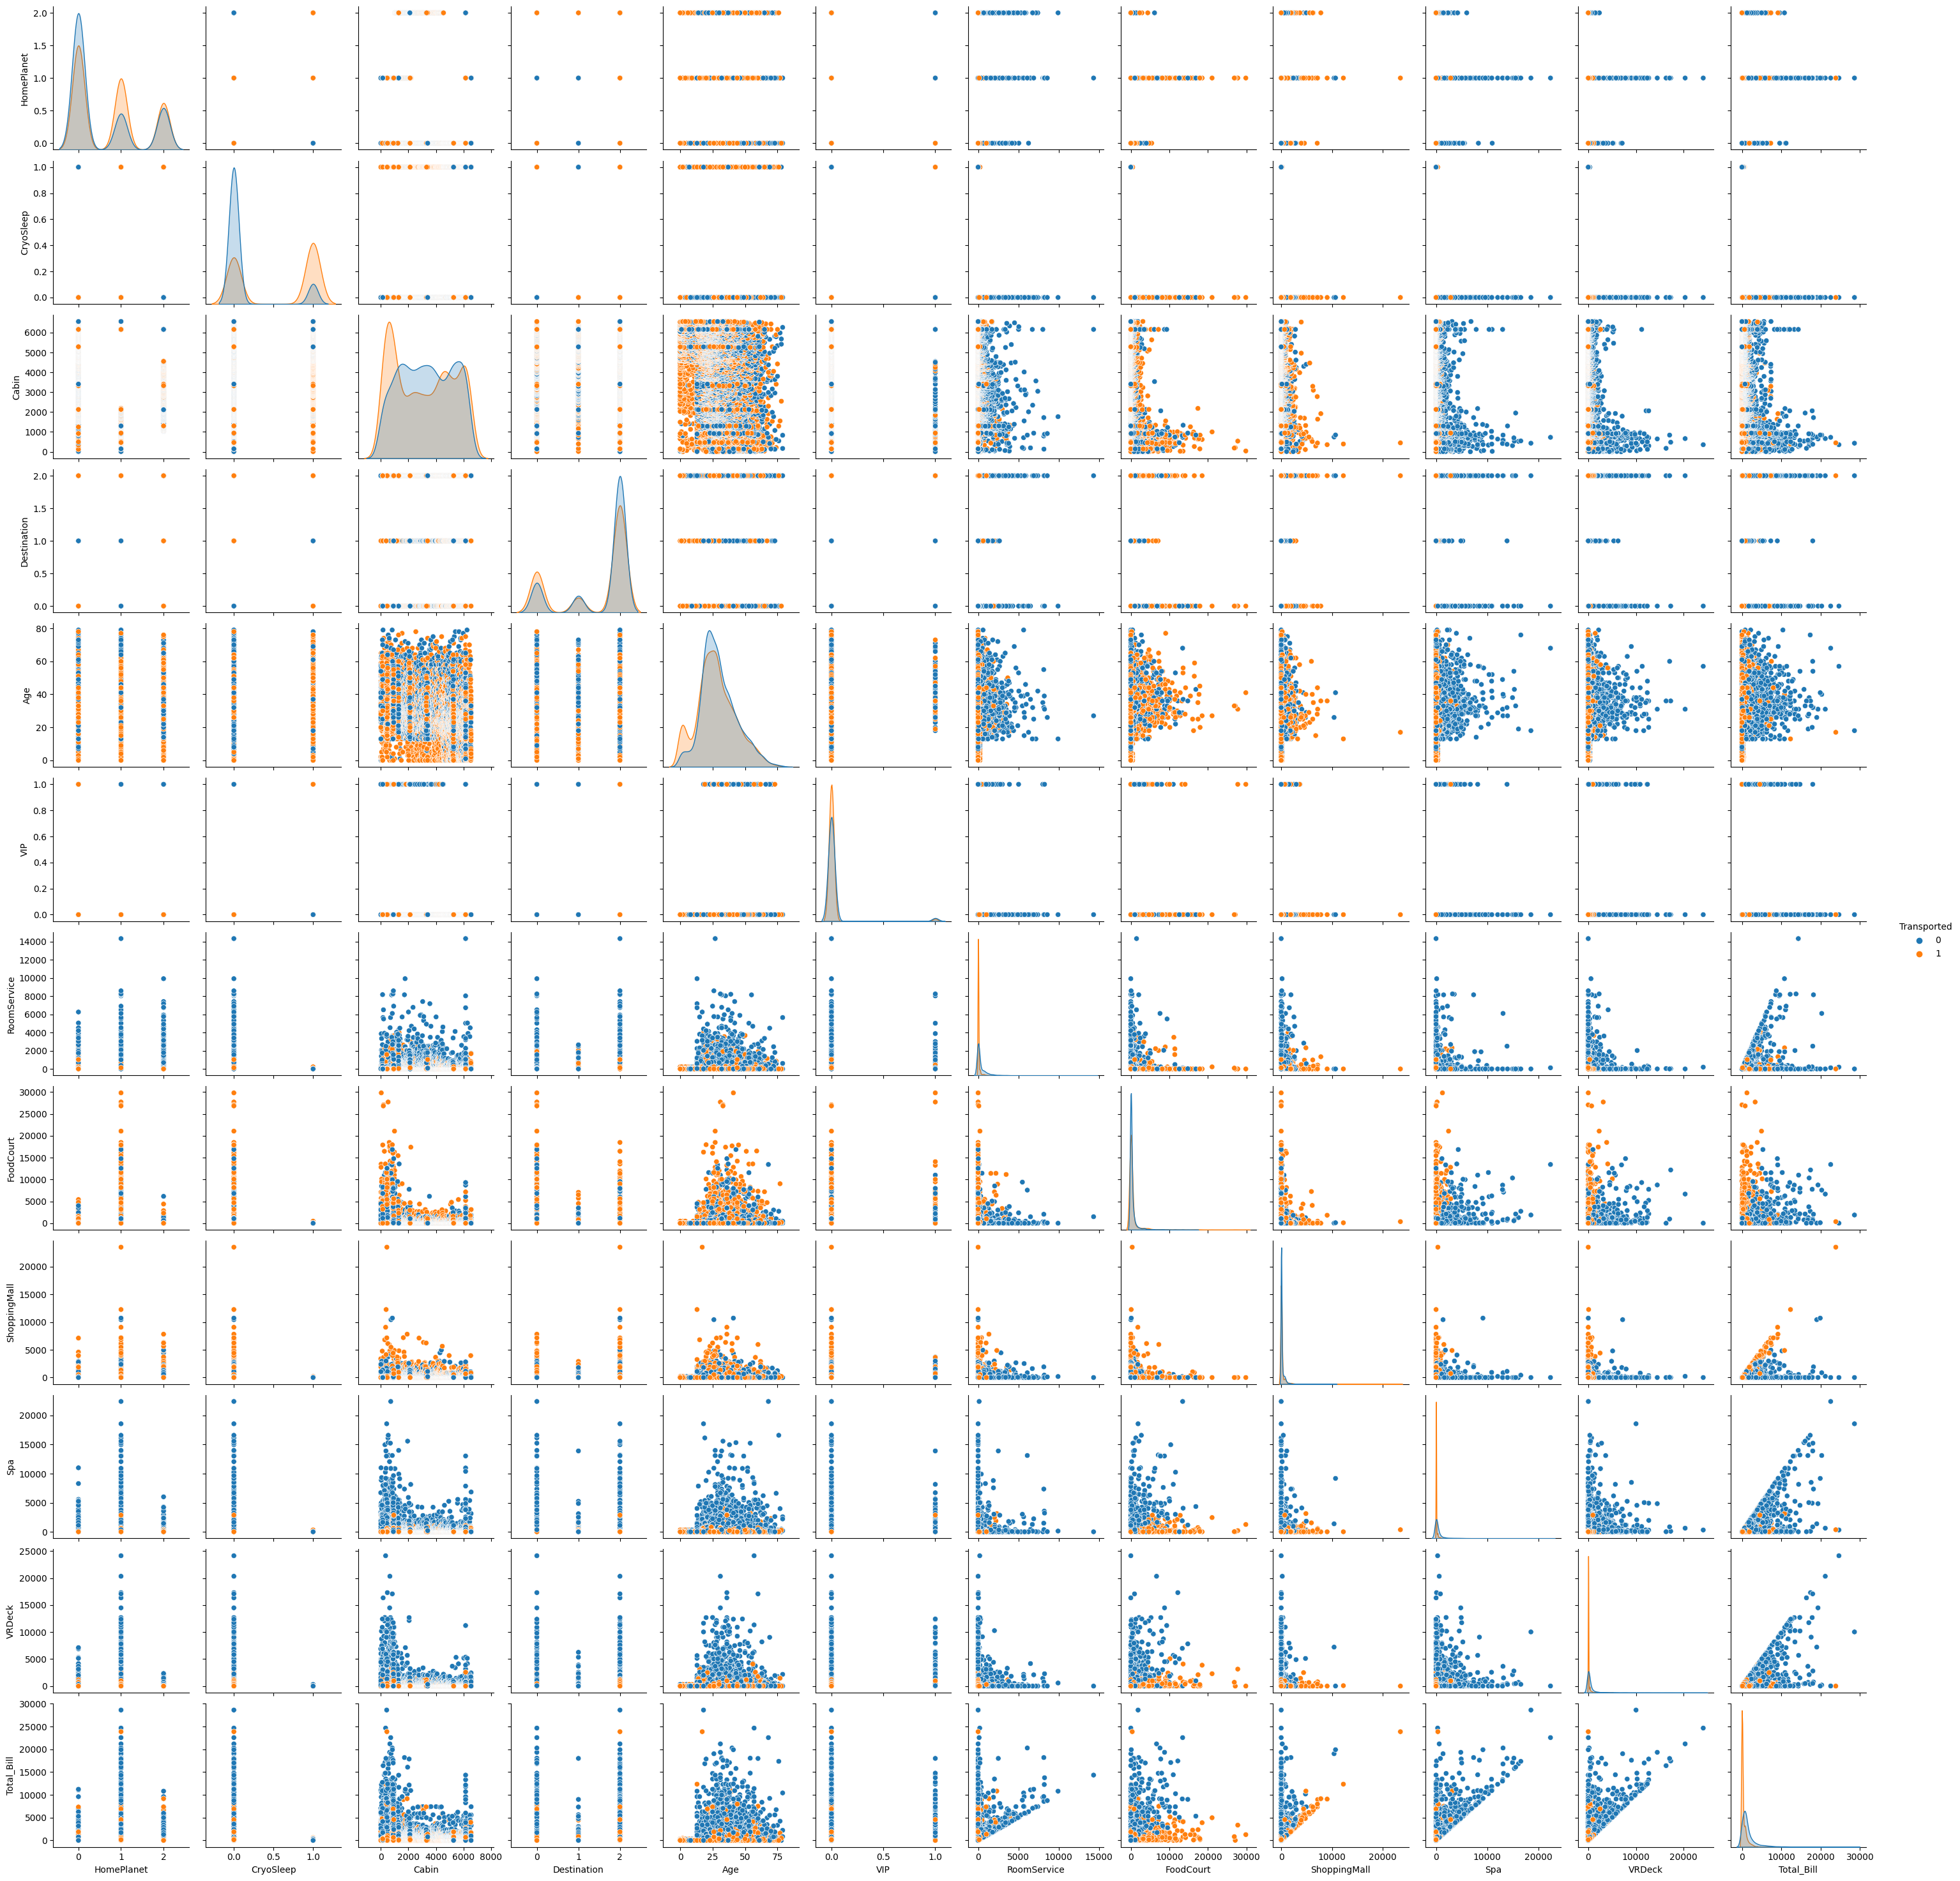

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.pairplot(train_df_encoded, hue='Transported')

<Axes: xlabel='Age', ylabel='Total_Bill'>

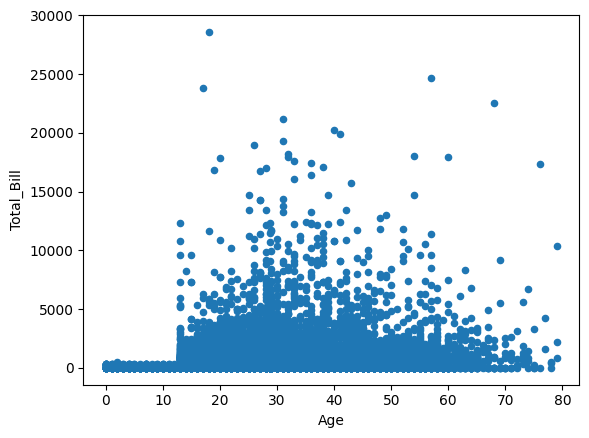

In [29]:
train_df.plot(x='Age',y='Total_Bill',kind='scatter')

<ipython-input-30-bd2b866a3f5b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df_encoded.corr(), annot=True, cmap='coolwarm')


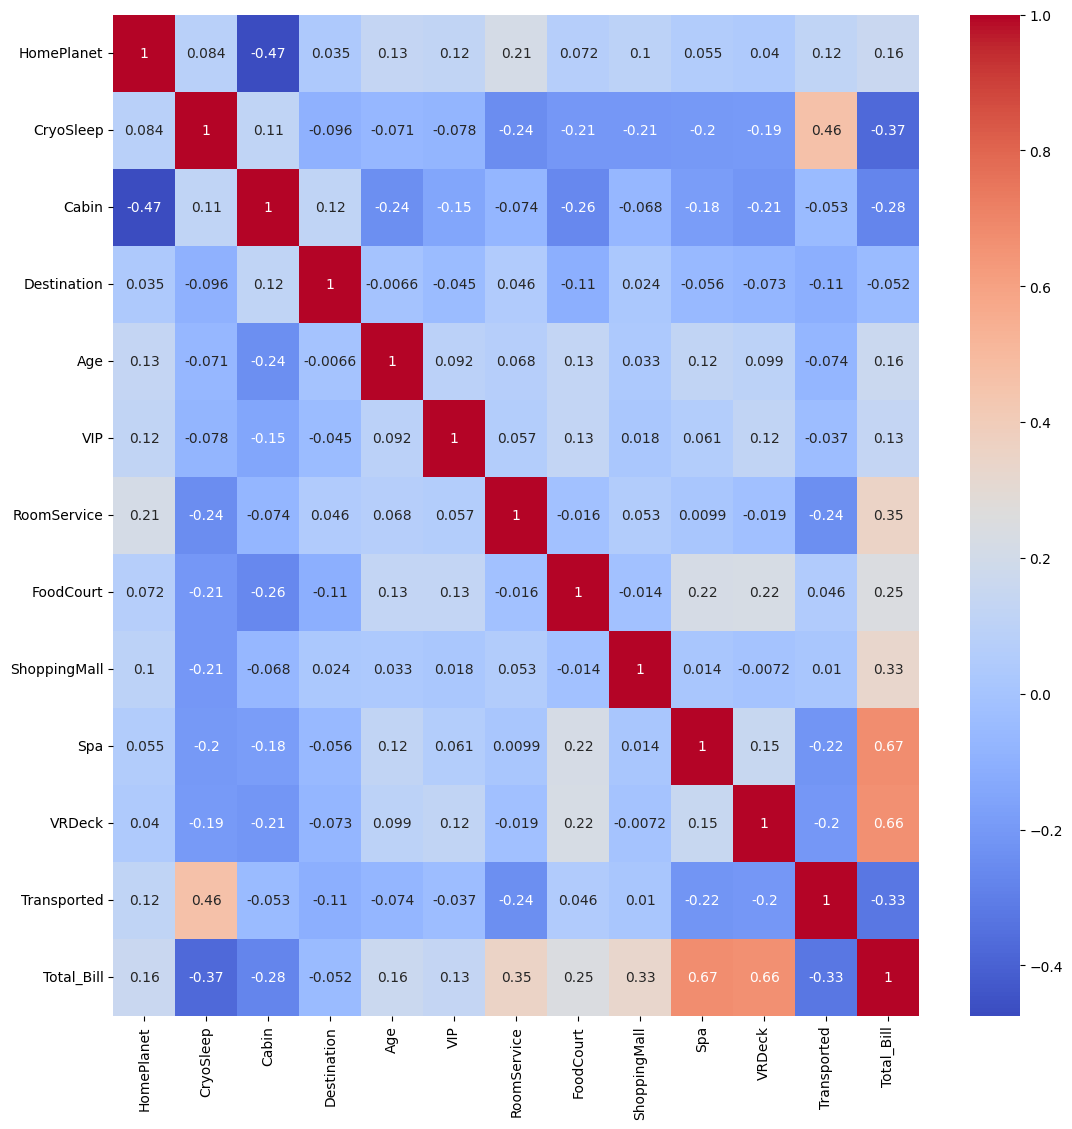

In [30]:
plt.figure(figsize=(13,13))
sns.heatmap(train_df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: >

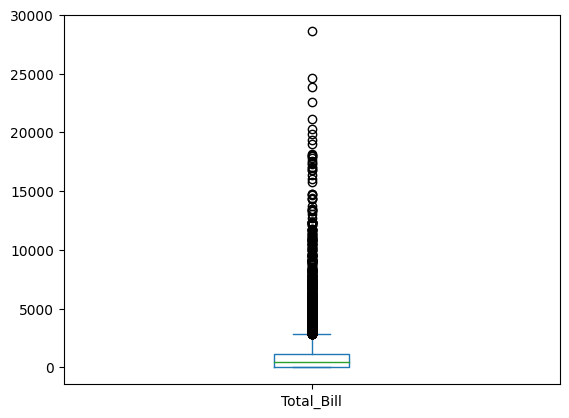

In [31]:
train_df['Total_Bill'].plot(kind='box')

In [32]:
print(np.mean(train_df['Age']))

print(np.median(train_df['Age']))

28.827930467465354
27.0


In [33]:
train_df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [34]:
train_df['VIP'].value_counts()

False    8494
True      199
Name: VIP, dtype: int64

In [35]:
train_df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars'], dtype=object)

In [36]:
train_df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object)

In [37]:
train_df.Cabin.unique().shape[0]

6560

In [38]:
pd.DataFrame(train_df.Cabin.unique())

,0
0,B/0/P
1,F/0/S
2,A/0/S
3,F/1/S
4,F/0/P
...,...
6555,A/97/P
6556,A/98/P
6557,G/1499/S
6558,G/1500/S


Text(0.5, 1.0, 'CryoSleep vs Transported')

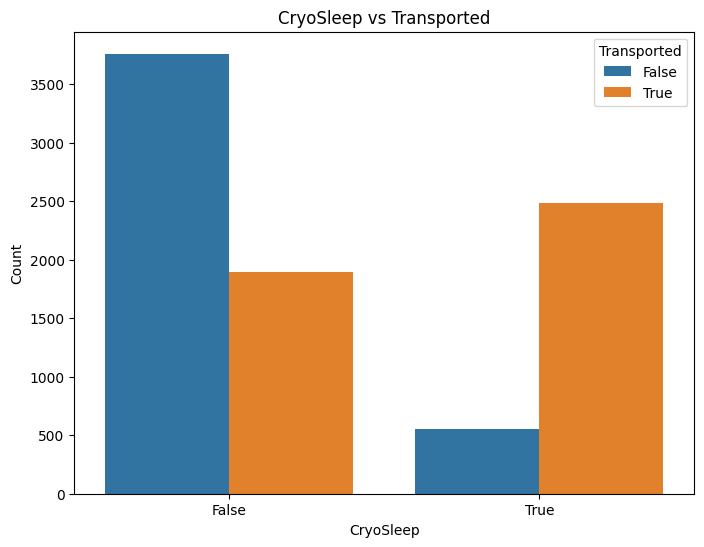

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CryoSleep', hue='Transported', data=train_df)
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.title('CryoSleep vs Transported')

#T-SNE

In [40]:
from sklearn.manifold import TSNE

In [41]:
train_df_encoded.shape

(8693, 15)

In [42]:
tsne = TSNE(n_components=3, random_state=42)
train_df_encoded=train_df_encoded.drop('Name', axis=1)
tsne_result = tsne.fit_transform(train_df_encoded)

In [43]:
tsne_result.shape

(8693, 3)

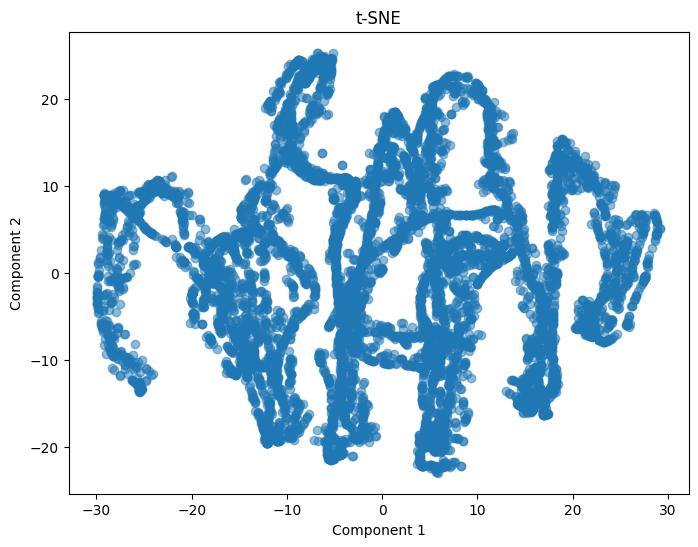

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.title('t-SNE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

#PCA

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(train_df_encoded)

In [47]:
pca_result.shape

(8693, 3)

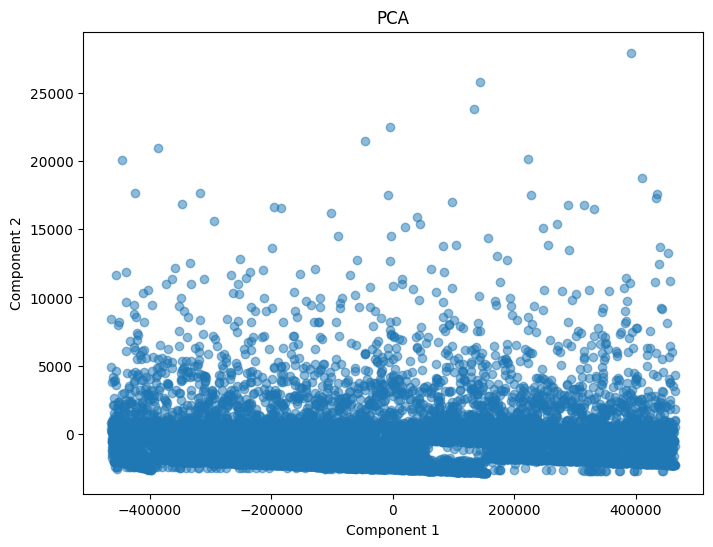

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

#Train-Test-Split

In [49]:
X = train_df_encoded.drop('Transported', axis=1)
Y= train_df_encoded['Transported']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = logreg.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7550316273720529


#Decision-Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt_clf = DecisionTreeClassifier()

In [57]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred = dt_clf.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7590569292696953


#Random-Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_pred = rf_clf.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.7768832662449684


#SVM

In [64]:
from sklearn.svm import SVC

In [65]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [66]:
y_pred = svm_clf.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)


SVM Accuracy: 0.5526164462334675


#XG-Boost

In [68]:
!pip install xgboost

In [71]:
from xgboost import XGBClassifier
xgmodel= XGBClassifier()

In [75]:
X_train=X_train.drop('PassengerId',axis=1)

In [76]:
xgmodel.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [78]:
X_test=X_test.drop('PassengerId',axis=1)

In [79]:
y_pred_xg = xgmodel.predict(X_test)

In [80]:
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.5526164462334675
